In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as pio

import datetime as dt

from scipy import stats
from bioinfokit.analys import stat

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows


C:\Users\43xqu\AppData\Local\Temp\ipykernel_13168\649407234.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


60

# Đọc dữ liệu

In [2]:
df = pd.read_csv('../data/5years.csv')

In [3]:
df.columns

Index(['YEAR', 'MO', 'DY', 'Temperature', 'Relative_Humidity',
       'Specific_Humidity', 'Precipitation', 'Pressure', 'Wind_Speed',
       'Wind_Direction'],
      dtype='object')

In [4]:
df.shape

(1826, 10)

In [5]:
df.size

18260

In [6]:
df.ndim

2

In [7]:
# Add date
date = df['MO'].astype('string') + '-' + df['DY'].astype('string') + '-' + df['YEAR'].astype('string')
date = pd.to_datetime(date, format='%m-%d-%Y')
df.insert(loc=0, column='DATE', value=date)

# Add quarter
def mo_to_qua(mo):
    if mo <= 3:
        return 1
    elif mo > 3 and mo <= 6:
        return 2
    elif mo > 6 and mo <= 9:
        return 3
    else:
        return 4

quarter = df['MO'].map(mo_to_qua)
df.insert(loc=1, column='QUARTER', value=quarter)

In [8]:
df.head(10)

,DATE,QUARTER,YEAR,MO,DY,Temperature,Relative_Humidity,Specific_Humidity,Precipitation,Pressure,Wind_Speed,Wind_Direction
0,2017-01-01,1,2017,1,1,26.40,81.50,17.27,0.28,100.51,2.64,96.75
1,2017-01-02,1,2017,1,2,26.67,79.38,17.03,0.22,100.49,2.81,90.94
2,2017-01-03,1,2017,1,3,26.91,77.19,16.91,0.06,100.46,1.99,106.56
3,2017-01-04,1,2017,1,4,26.06,80.62,16.85,0.00,100.39,2.52,115.00
4,2017-01-05,1,2017,1,5,26.54,81.00,17.27,0.00,100.34,3.47,83.19
5,2017-01-06,1,2017,1,6,26.63,79.31,17.09,0.01,100.23,3.06,103.19
6,2017-01-07,1,2017,1,7,25.89,83.12,17.21,0.00,100.22,3.86,98.50
7,2017-01-08,1,2017,1,8,25.99,81.31,16.78,0.00,100.25,3.50,112.88
8,2017-01-09,1,2017,1,9,26.44,78.81,16.48,0.00,100.27,3.05,119.69
9,2017-01-10,1,2017,1,10,26.78,76.50,16.42,0.00,100.35,2.31,104.19


# Thống kê mô tả

In [9]:
df.describe(include="all")

C:\Users\43xqu\AppData\Local\Temp\ipykernel_13168\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,DATE,QUARTER,YEAR,MO,DY,Temperature,Relative_Humidity,Specific_Humidity,Precipitation,Pressure,Wind_Speed,Wind_Direction
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
unique,1826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.508762,2019.000548,6.523549,15.727820,27.574042,77.966117,17.452136,4.290865,100.395071,2.956457,173.154485
std,NaN,1.117326,1.414407,3.449478,8.801735,1.963590,12.623926,2.385171,8.541784,0.187667,1.116806,62.906469
min,NaN,1.000000,2017.000000,1.000000,1.000000,19.900000,43.000000,9.280000,0.000000,99.870000,0.680000,22.310000
25%,NaN,2.000000,2018.000000,4.000000,8.000000,26.370000,67.075000,15.750000,0.020000,100.260000,2.090000,122.502500


# Kiểm tra missing value

In [10]:
df.sample(5)

,DATE,QUARTER,YEAR,MO,DY,Temperature,Relative_Humidity,Specific_Humidity,Precipitation,Pressure,Wind_Speed,Wind_Direction
1493,2021-02-02,1,2021,2,2,25.27,72.19,13.85,0.00,100.71,1.27,87.81
687,2018-11-19,4,2018,11,19,25.65,89.38,18.31,0.86,100.60,3.75,163.50
663,2018-10-26,4,2018,10,26,27.73,81.44,18.62,0.11,100.66,1.70,110.38
917,2019-07-07,3,2019,7,7,27.12,89.44,20.08,0.40,100.27,3.29,240.50
516,2018-06-01,2,2018,6,1,28.01,78.69,18.31,8.09,100.41,2.37,255.94


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               1826 non-null   datetime64[ns]
 1   QUARTER            1826 non-null   int64         
 2   YEAR               1826 non-null   int64         
 3   MO                 1826 non-null   int64         
 4   DY                 1826 non-null   int64         
 5   Temperature        1826 non-null   float64       
 6   Relative_Humidity  1826 non-null   float64       
 7   Specific_Humidity  1826 non-null   float64       
 8   Precipitation      1826 non-null   float64       
 9   Pressure           1826 non-null   float64       
 10  Wind_Speed         1826 non-null   float64       
 11  Wind_Direction     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 171.3 KB


In [12]:
df.isna().sum()

DATE                 0
QUARTER              0
YEAR                 0
MO                   0
DY                   0
Temperature          0
Relative_Humidity    0
Specific_Humidity    0
Precipitation        0
Pressure             0
Wind_Speed           0
Wind_Direction       0
dtype: int64

__Dữ liệu không có bất cứ missing value nào__

# Kiểm tra có missing `timestamp` nào không?

In [13]:
date_range = pd.date_range(df.loc[0]['DATE'], df.loc[len(df) - 1]['DATE'], freq='D').to_series()

In [14]:
len(date_range)

1826

In [15]:
len(df)

1826

__Như vậy, chúng ta thấy dữ liệu không bị missing bất cứ ngày nào__

# Phân tích tương quan giữa các biến

In [48]:
df.columns

Index(['DATE', 'QUARTER', 'YEAR', 'MO', 'DY', 'Temperature',
       'Relative_Humidity', 'Specific_Humidity', 'Precipitation', 'Pressure',
       'Wind_Speed', 'Wind_Direction'],
      dtype='object')

In [54]:
cols = ['Temperature', 'Relative_Humidity', 'Specific_Humidity', 'Precipitation', 'Pressure', 'Wind_Speed', 'Wind_Direction']
corr = df[cols].corr()

In [55]:
def get_corr(target):
    pearson_corr = pd.DataFrame()
    cols = df.columns[3:]
    cols = cols.drop(target)
    for col in cols:
        pearson_correlation, p_value = stats.pearsonr(df[col], df[target])
        temp = pd.DataFrame({
            'Comparison': [col + ' - ' + target],
            'Pearson Correlation': [pearson_correlation],
            'P-Value': [p_value]
        })
        pearson_corr = pd.concat([pearson_corr, temp], axis=0)
    pearson_corr.set_index('Comparison', inplace=True)
    return pearson_corr

def pairplot_one(col):
    plt.figure(figsize=(17, 14))
    sns.pairplot(data=df, x_vars=cols, y_vars=col)
    plt.title('Biểu đồ tán xạ giữa ' + col + ' và cá biến còn lại')
    plt.show();

def heatmap_one(col):
    plt.figure(figsize=(20,2))
    sns.heatmap(corr[[col]].T, annot=True)
    plt.title('Biểu đồ heatmap giữa ' + col + ' và cá biến còn lại')
    plt.show();

## 1. Target là `Temperature`

<Figure size 1700x1400 with 0 Axes>

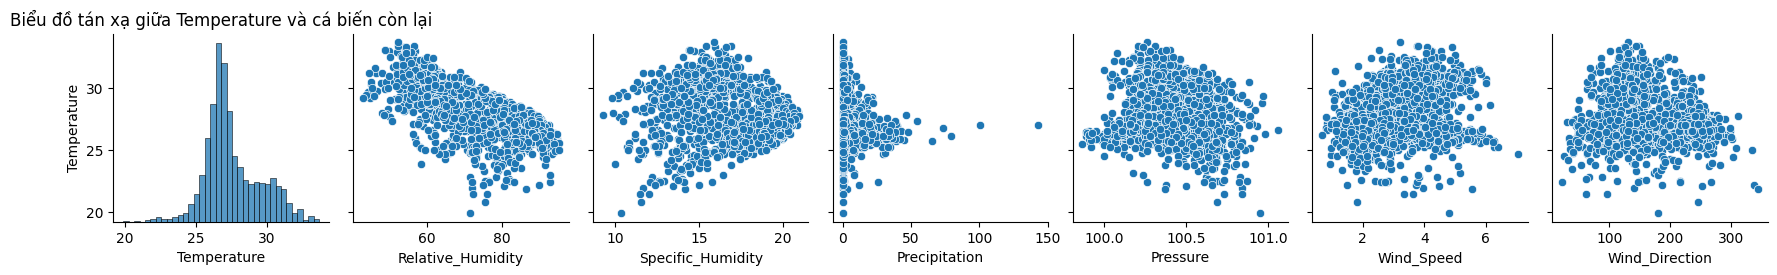

In [56]:
pairplot_one('Temperature')

__Nhận xét:__ Phân phối của `Temperature` khá gần dạng chuẩn.

In [57]:
get_corr('Temperature')

,Pearson Correlation,P-Value
Comparison,,
MO - Temperature,-0.466977,1.484216e-99
DY - Temperature,0.027586,2.387190e-01
Relative_Humidity - Temperature,-0.708149,5.140514e-278
Specific_Humidity - Temperature,-0.217410,5.636914e-21
Precipitation - Temperature,-0.219789,2.060162e-21
Pressure - Temperature,-0.053071,2.333760e-02
Wind_Speed - Temperature,0.267427,2.823645e-31
Wind_Direction - Temperature,-0.239114,3.714866e-25


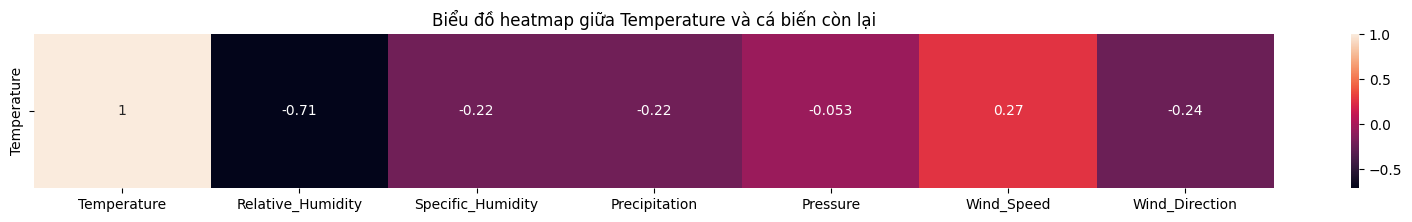

In [58]:
heatmap_one('Temperature')

__Nhận xét:__ Đa phần các biến tương quan với `Temperature` đều có xu hướng nghịch biến, trong đó tương quan ở mức mạnh là `Relative_Humidity` với `-0.71`, các biến còn lại đều tương quan ở mức yếu dưới `0.5` đều có ý nghĩa thống kê.

## 2. Target là `Relative_Humidity`

<Figure size 1700x1400 with 0 Axes>

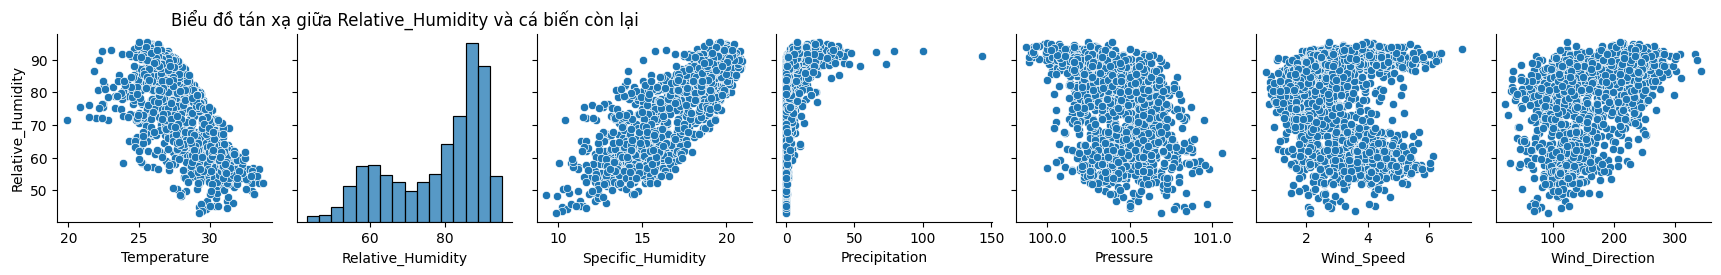

In [59]:
pairplot_one('Relative_Humidity')

__Nhận xét:__ Phân phối của `Relative_Hidmidity` khá lệch trái.

In [60]:
get_corr('Relative_Humidity')

,Pearson Correlation,P-Value
Comparison,,
MO - Relative_Humidity,0.653259,1.169372e-222
DY - Relative_Humidity,0.017487,4.551971e-01
Temperature - Relative_Humidity,-0.708149,5.140514e-278
Specific_Humidity - Relative_Humidity,0.838518,0.000000e+00
Precipitation - Relative_Humidity,0.411554,1.420297e-75
Pressure - Relative_Humidity,-0.443263,9.542546e-89
Wind_Speed - Relative_Humidity,-0.173518,8.244539e-14
Wind_Direction - Relative_Humidity,0.560280,1.994501e-151


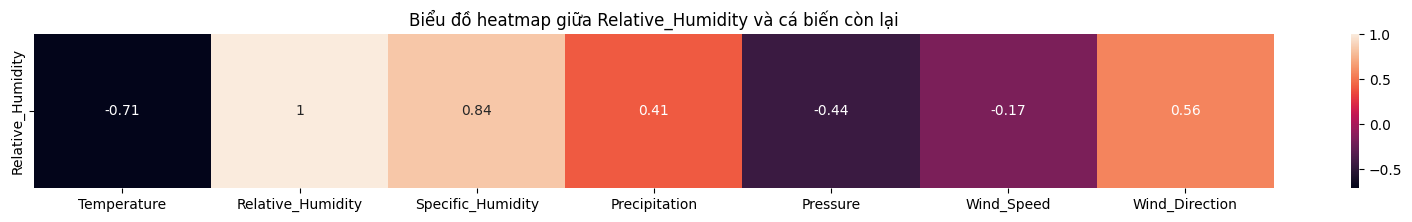

In [61]:
heatmap_one('Relative_Humidity')

__Nhận xét:__ Các biến tương quan mạnh với `Relative_Humidity` là `Temperature` và `Specifi_Humidity`, các biến còn lại tương quan yếu.

## 3. Target là `Specific_Humidity`

<Figure size 1700x1400 with 0 Axes>

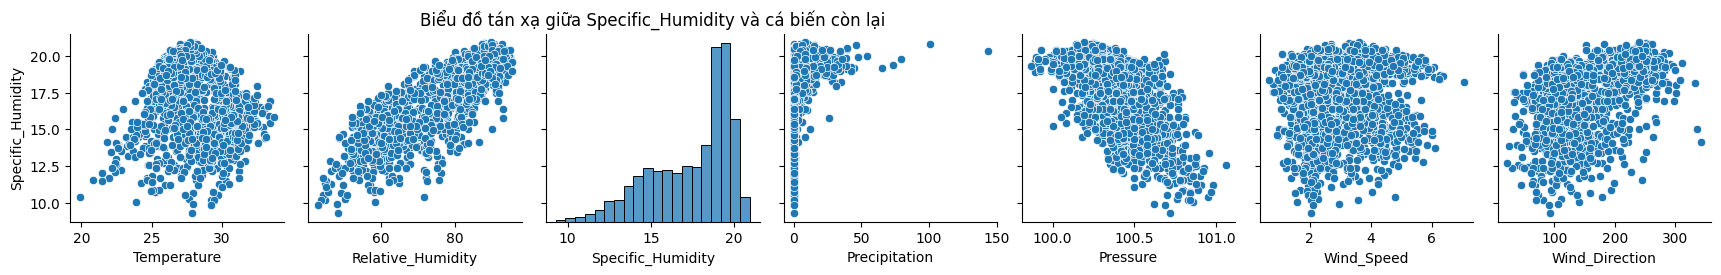

In [62]:
pairplot_one('Specific_Humidity')

__Nhận xét:__ Phân phối của `Specific_Humidity` khá lệch trái.

In [63]:
get_corr('Specific_Humidity')

,Pearson Correlation,P-Value
Comparison,,
MO - Specific_Humidity,0.538103,1.367293e-137
DY - Specific_Humidity,0.045089,5.405714e-02
Temperature - Specific_Humidity,-0.217410,5.636914e-21
Relative_Humidity - Specific_Humidity,0.838518,0.000000e+00
Precipitation - Specific_Humidity,0.384286,2.494885e-65
Pressure - Specific_Humidity,-0.642811,2.099793e-213
Wind_Speed - Specific_Humidity,-0.072223,2.014107e-03
Wind_Direction - Specific_Humidity,0.585373,2.123834e-168


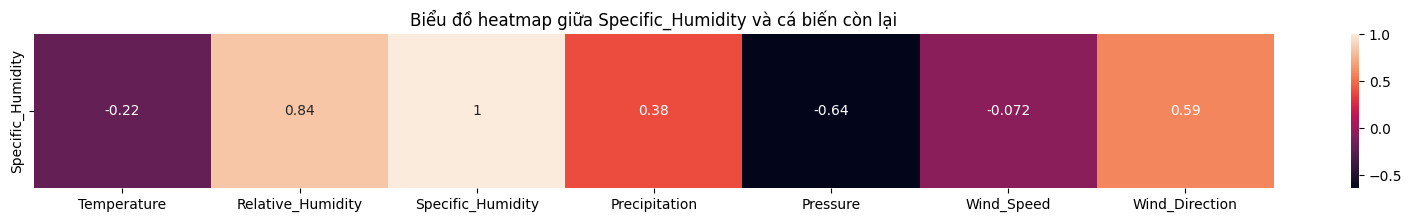

In [64]:
heatmap_one('Specific_Humidity')

__Nhận xét:__ Các biến tương quan mạnh với `Specific_Humidity` là `Relative_Humidity` và `Pressure`, các biến còn lại tương quan yếu.

## 4. Target là `Precipitation`

<Figure size 1700x1400 with 0 Axes>

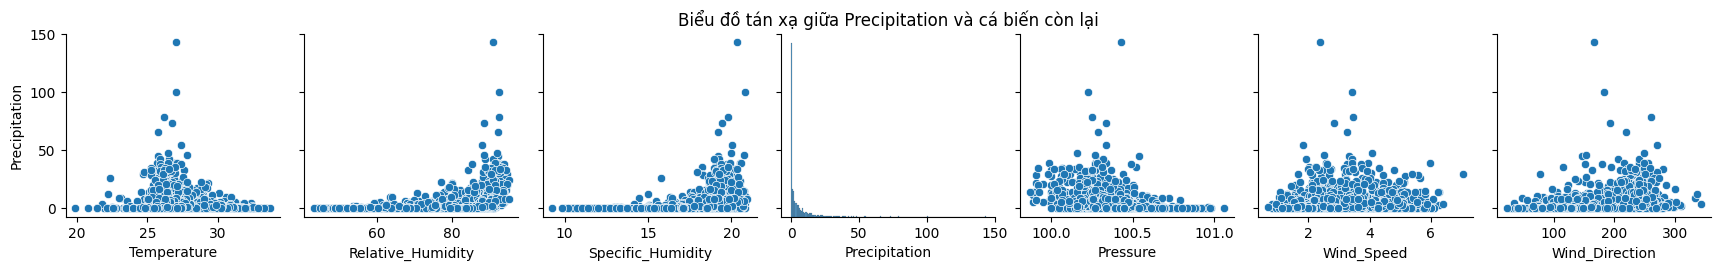

In [65]:
pairplot_one('Precipitation')

__Nhận xét:__ Phân phối của `Precipitation` lệch phải quá nhiều ~ xấp xỉ phân phối mũ.

In [66]:
get_corr('Precipitation')

,Pearson Correlation,P-Value
Comparison,,
MO - Precipitation,0.163455,2.106242e-12
DY - Precipitation,-0.022501,3.365720e-01
Temperature - Precipitation,-0.219789,2.060162e-21
Relative_Humidity - Precipitation,0.411554,1.420297e-75
Specific_Humidity - Precipitation,0.384286,2.494885e-65
Pressure - Precipitation,-0.338747,2.911661e-50
Wind_Speed - Precipitation,0.098205,2.624950e-05
Wind_Direction - Precipitation,0.328538,3.262634e-47


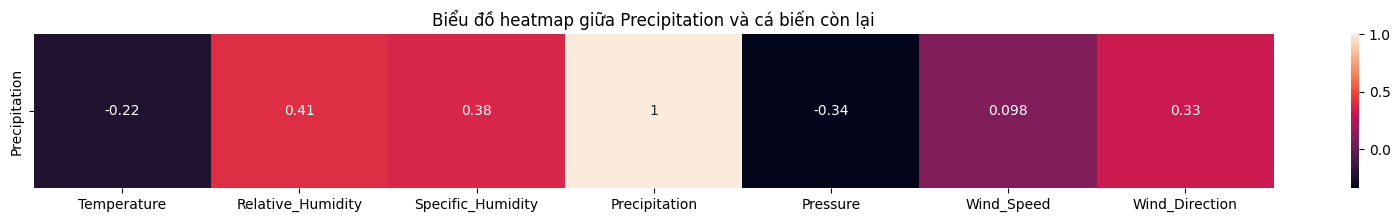

In [67]:
heatmap_one('Precipitation')

__Nhận xét:__ Độ tương quan của `Precipitation` và các biến khác giao động ở mức yếu trở xuống, và không nhiều ý nghĩa vì phân phối lệch phải quá nhiều.

## 5. Target là `Pressure`

<Figure size 1700x1400 with 0 Axes>

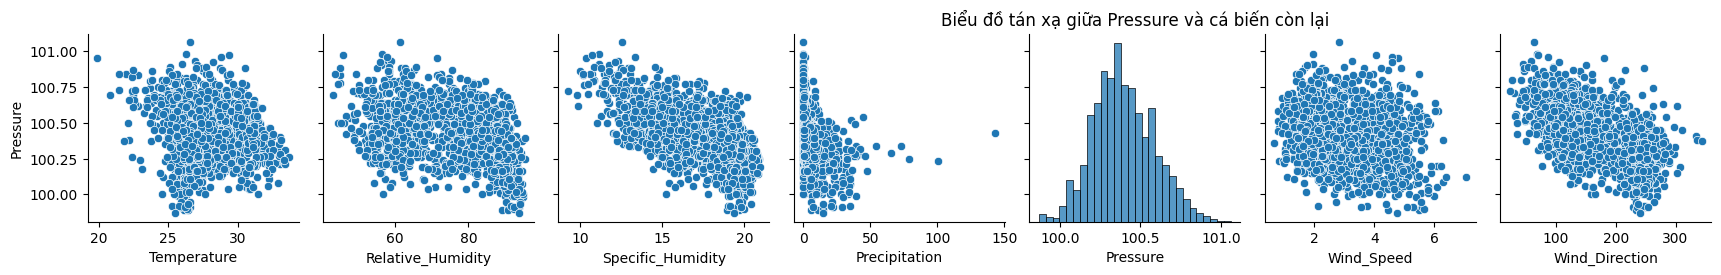

In [68]:
pairplot_one('Pressure')

__Nhận xét:__ Phân phối của `Pressure` gần như đạt dạng chuẩn.

In [69]:
get_corr('Pressure')

,Pearson Correlation,P-Value
Comparison,,
MO - Pressure,-0.204439,1.110415e-18
DY - Pressure,-0.015783,5.002895e-01
Temperature - Pressure,-0.053071,2.333760e-02
Relative_Humidity - Pressure,-0.443263,9.542546e-89
Specific_Humidity - Pressure,-0.642811,2.099793e-213
Precipitation - Pressure,-0.338747,2.911661e-50
Wind_Speed - Pressure,-0.235182,2.289058e-24
Wind_Direction - Pressure,-0.582824,1.316588e-166


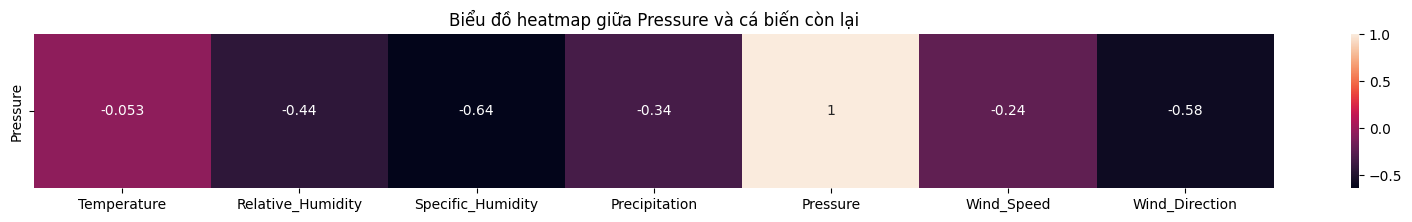

In [70]:
heatmap_one('Pressure')

__Nhận xét:__ Các biến tương quan trung bình với `Pressure` là `Specific_Humidity` và `Win_Direction`, các biến còn lại tương quan yếu. (Tất cả đều có ý nghĩa thống kê `p-value < 0.05`)

## 6. Target là `Wind_Speed`

<Figure size 1700x1400 with 0 Axes>

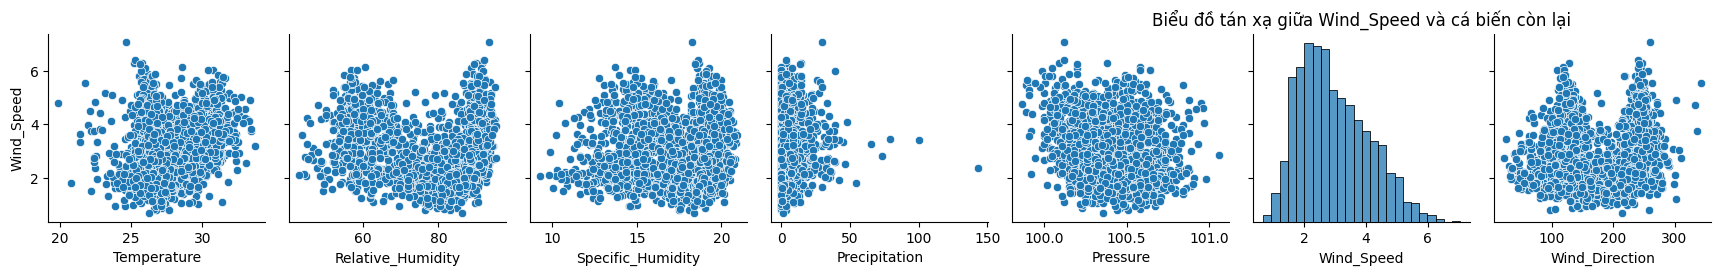

In [71]:
pairplot_one('Wind_Speed')

__Nhận xét:__ Phân phối của `Wind_Speed` hơi lệch phải 1 xíu.

In [72]:
get_corr('Wind_Speed')

,Pearson Correlation,P-Value
Comparison,,
MO - Wind_Speed,-0.235117,2.357558e-24
DY - Wind_Speed,-0.052817,2.400810e-02
Temperature - Wind_Speed,0.267427,2.823645e-31
Relative_Humidity - Wind_Speed,-0.173518,8.244539e-14
Specific_Humidity - Wind_Speed,-0.072223,2.014107e-03
Precipitation - Wind_Speed,0.098205,2.624950e-05
Pressure - Wind_Speed,-0.235182,2.289058e-24
Wind_Direction - Wind_Speed,0.115686,7.168870e-07


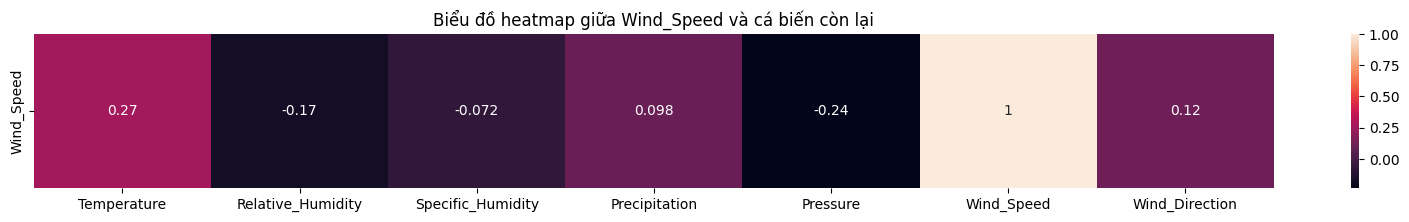

In [73]:
heatmap_one('Wind_Speed')

__Nhận xét:__ `Wind_Speed` không có tương quan mạnh với các biến, trừ `pm25` có tương quan ở mức trung bình `-0.52`.

## 7. Target là `Wind_Direction`

<Figure size 1700x1400 with 0 Axes>

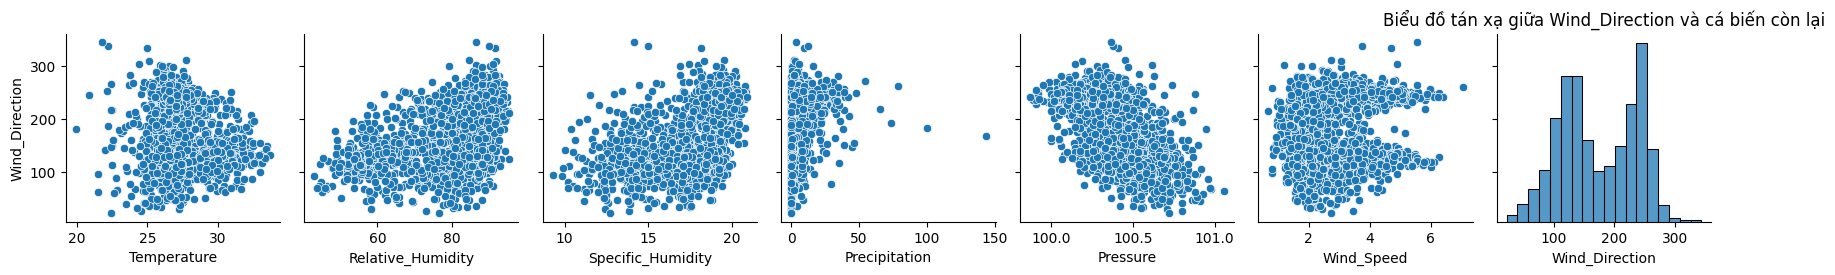

In [74]:
pairplot_one('Wind_Direction')

__Nhận xét:__ Phân phối của `Wind_Direction` không hiểu bị gì :))).

In [75]:
get_corr('Wind_Direction')

,Pearson Correlation,P-Value
Comparison,,
MO - Wind_Direction,0.217264,5.994238e-21
DY - Wind_Direction,0.005505,8.141435e-01
Temperature - Wind_Direction,-0.239114,3.714866e-25
Relative_Humidity - Wind_Direction,0.560280,1.994501e-151
Specific_Humidity - Wind_Direction,0.585373,2.123834e-168
Precipitation - Wind_Direction,0.328538,3.262634e-47
Pressure - Wind_Direction,-0.582824,1.316588e-166
Wind_Speed - Wind_Direction,0.115686,7.168870e-07


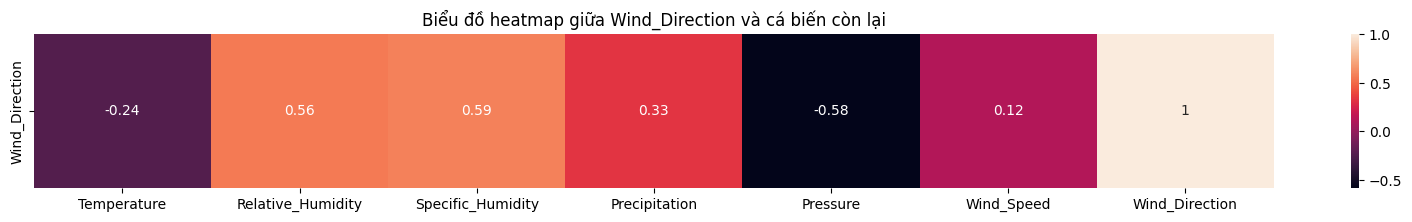

In [76]:
heatmap_one('Wind_Direction')

__Nhận xét:__ `Wind_Direction` có tương quan trung bình với các biến `Relative_Humidity`, `Specific_Humidity` và `Pressure`, tuy nhiên gần như không có tương quan nhiều với `Wind_Speed`.

# Phân tích khác biệt

In [77]:
def different_between_barplot(category, col):
    df_temp = df[[category, col]]
    df_group = df_temp.groupby([category], as_index=False).mean()
    plt.figure(figsize=(15, 5))
    sns.barplot(x=col, y=category, data=df_group.sort_values(col, ascending=False), orient = 'h')
    plt.title('Trung bình ' + col + ' giữa các ' + category)

def different_between_boxplot(category, col):
    plt.figure(figsize=(25,10))
    sns.boxplot(x=category, y=col, data=df, showmeans=True)
    plt.title('Boxplot cho ' + col + ' theo ' + category)
    plt.show()

def different_between_anova(category, col):
    group_anova = df[[category, col]].groupby([category])
    samples = [group_anova.get_group(mo)[col] for mo in df[category].unique()]
    f_test_value, p_value = stats.f_oneway(*samples)
    return f_test_value, p_value

def different_between_post_hoc(category, col):
    res = stat()
    res.tukey_hsd(df=df, res_var=col, xfac_var=category, anova_model=col+' ~ C('+category+')')
    result_post_hoc = res.tukey_summary
    return result_post_hoc[result_post_hoc['p-value'] < 0.05]

## Phân tích khác biệt giữa các tháng `MO`

### Có sự khác biệt mức độ `Temperature` giữa các tháng?

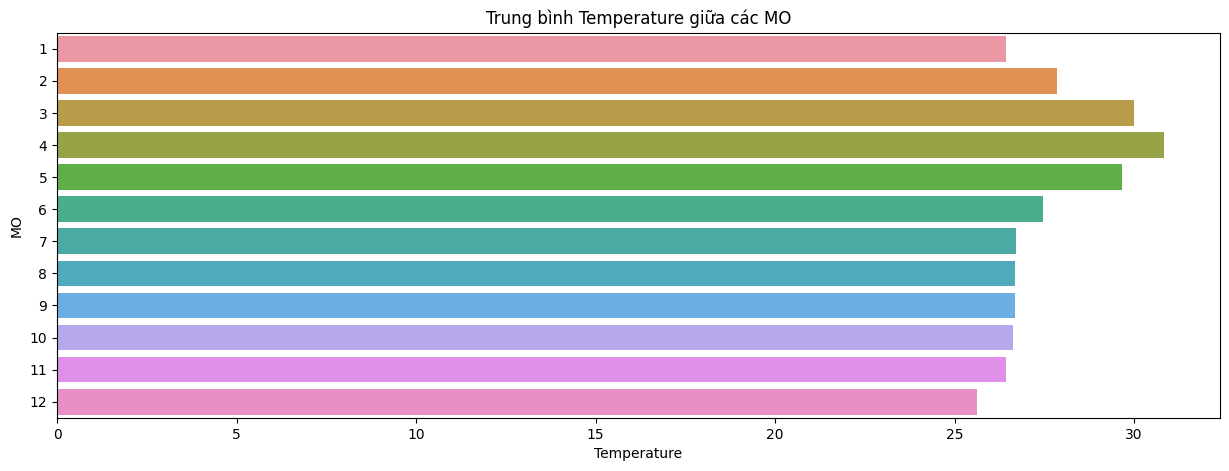

In [78]:
different_between_barplot('MO', 'Temperature')

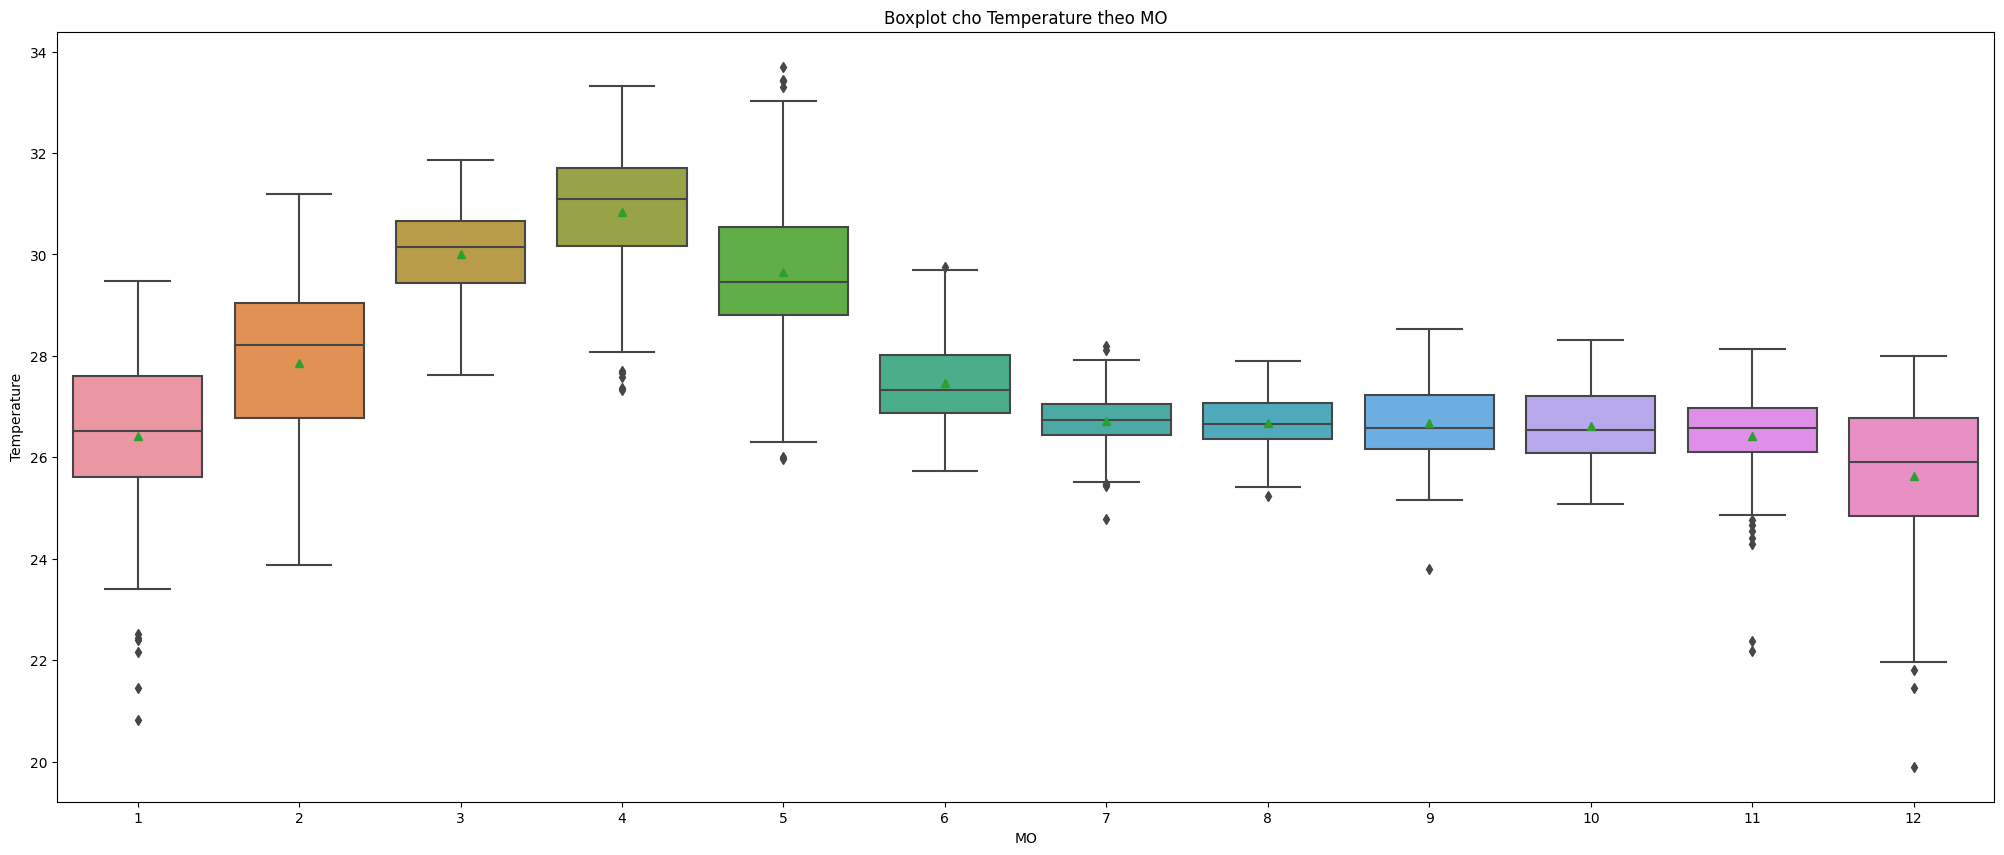

In [79]:
different_between_boxplot('MO', 'Temperature')

Kiểm định bằng `ANOVA`

In [80]:
different_between_anova('MO', 'Temperature')

(329.3161416098429, 0.0)

__Kết luận__: Chúng ta có thể kết luận rằng có sự khác biệt mức độ `Temperature` giữa các tháng `MO` với nhau khi giá trị `p-value = 0 < 0.05` và `f-test-value = 329` rất cao.

Kiểm định bằng `post-hoc`

In [81]:
different_between_post_hoc('MO', 'Temperature')

e:\projects\data_visualization\gan_imputation\venv\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,1.433832,1.000560,1.867103,15.315079,0.001
1,1,3,3.581032,3.158131,4.003933,39.187776,0.001
2,1,4,4.417972,3.991561,4.844383,47.948613,0.001
3,1,5,3.241097,2.818196,3.663998,35.467810,0.001
4,1,6,1.040839,0.614428,1.467249,11.296308,0.001
10,1,12,0.788387,0.365486,1.211288,8.627439,0.001
11,2,3,2.147201,1.713929,2.580472,22.934734,0.001
12,2,4,2.984140,2.547443,3.420838,31.624195,0.001
13,2,5,1.807265,1.373994,2.240537,19.303806,0.001
15,2,7,1.129574,0.696302,1.562845,12.065230,0.001


__Kết luận__: Chúng ta có thể thấy các cặp tháng có khác biệt mà có ý nghĩa thống kê `< 0.05` như bảng trên

## Phân tích khác biệt giữa các năm `YEAR`

### Có sự khác biệt mức độ `Temperature` giữa các năm?

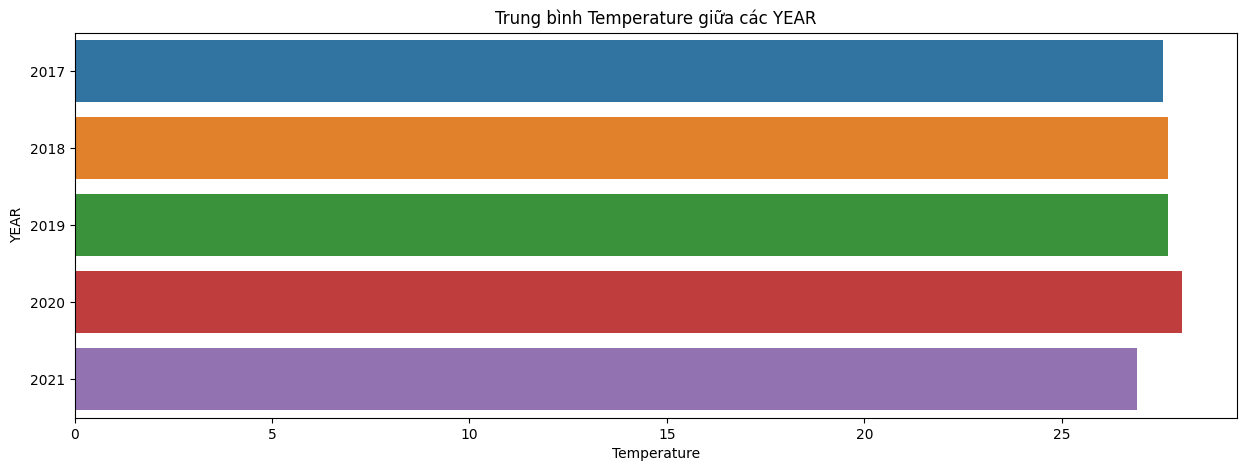

In [82]:
different_between_barplot('YEAR', 'Temperature')

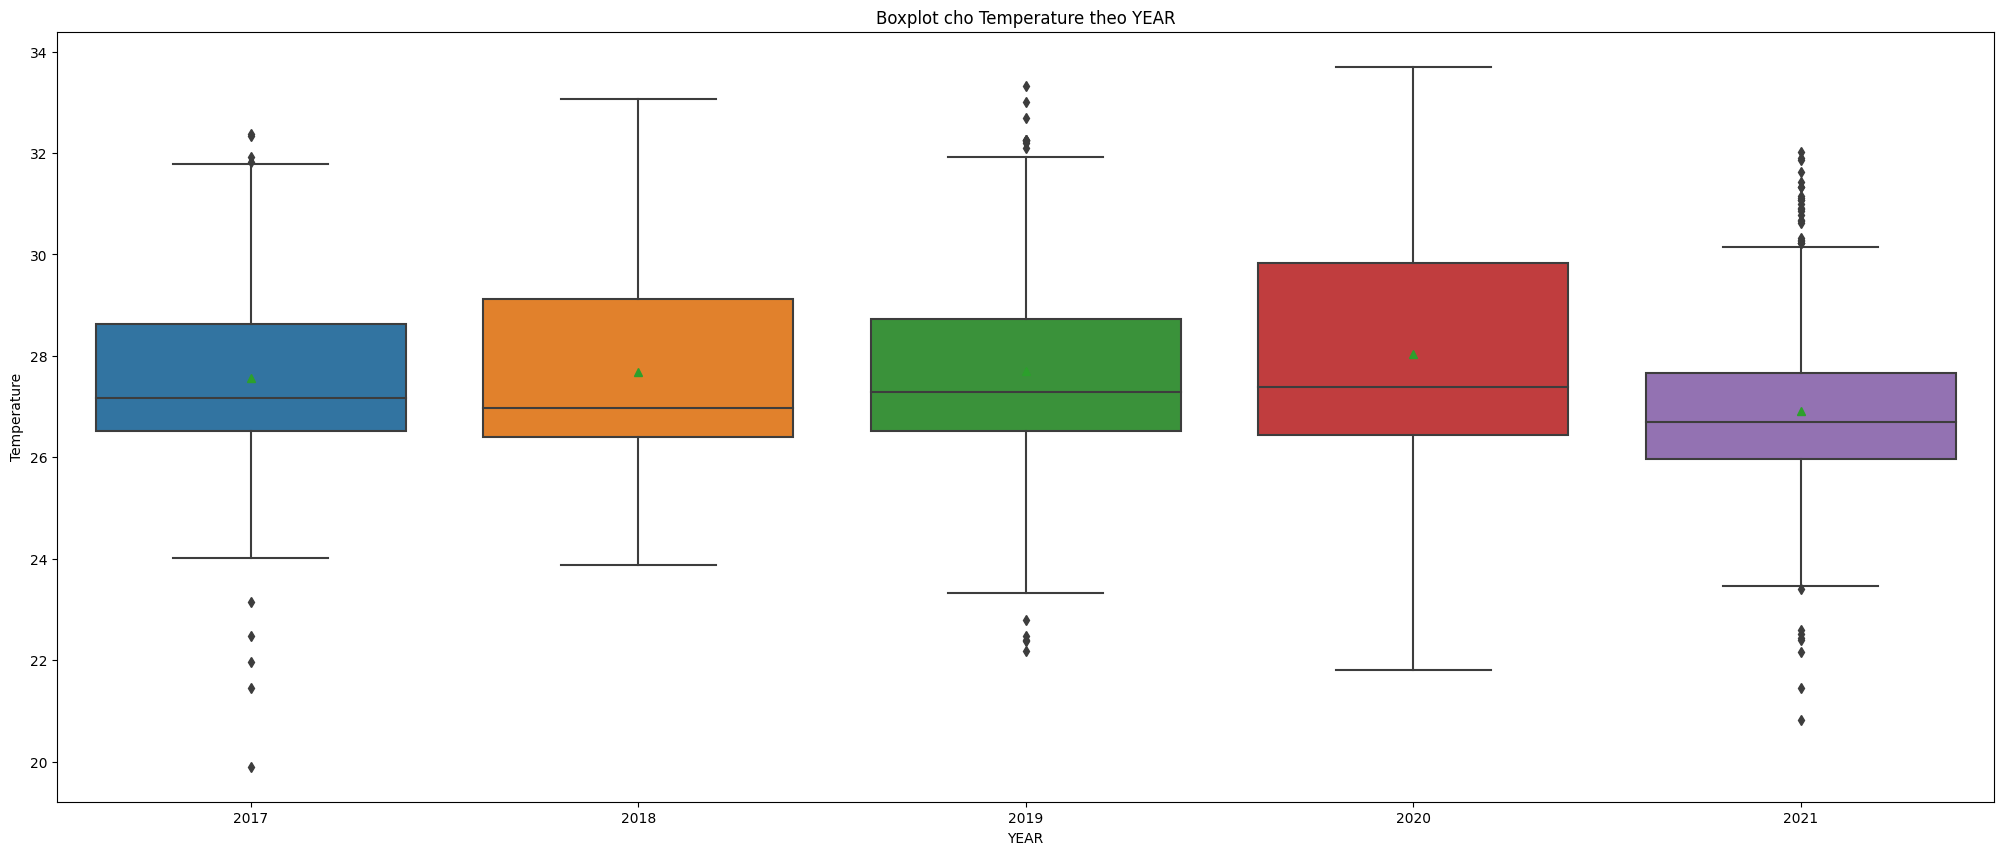

In [83]:
different_between_boxplot('YEAR', 'Temperature')

Kiểm định bằng `ANOVA`

In [84]:
different_between_anova('YEAR', 'Temperature')

(16.614132656982008, 2.2157245463998837e-13)

__Kết luận__: Chúng ta có thể kết luận rằng có sự khác biệt mức độ `Temperature` giữa các năm `YEAR` với nhau khi giá trị `p-value = 2.2e-13 < 0.05`

Kiểm định bằng `post-hoc`

In [85]:
different_between_post_hoc('YEAR', 'Temperature')

e:\projects\data_visualization\gan_imputation\venv\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
2,2017,2020,0.474488,0.084495,0.864482,4.698131,0.008099
3,2017,2021,0.649041,0.258781,1.039302,6.422067,0.001000
6,2018,2021,0.771562,0.381301,1.161822,7.634371,0.001000
8,2019,2021,0.783863,0.393603,1.174123,7.756090,0.001000
9,2020,2021,1.123530,0.733536,1.513523,11.124589,0.001000


__Kết luận__: Chúng ta có thể thấy các cặp năm có khác biệt mà có ý nghĩa thống kê `< 0.05` như bảng trên